In [12]:
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

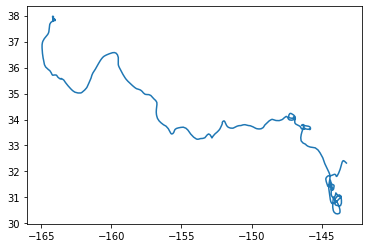

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/oceanhackweek/ohw19-projects-Trackpy/7d62174c4188a0f3d4aaadf848ef91e36da63289/data/example_turtle_track.csv"
track = pd.read_csv(url)
track_ex = pd.read_csv(url, parse_dates=['datetime'])
track_ex.head(5)

plt.plot(track_ex.lon,track_ex.lat)

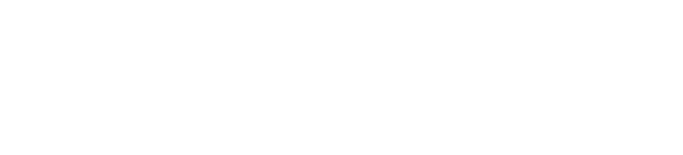

In [16]:
%matplotlib inline
import pyproj as pyproj
from pyproj import Proj, transform
import cartopy.crs as ccrs

inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:32662')

def convertCoords(row):
    x2,y2 = pyproj.transform(inProj,outProj,row['lon'],row['lat'])
    return pd.Series({'newLong':x2,'newLat':y2})

track_ex[['newLong','newLat']] = track_ex.apply(convertCoords,axis=1)

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180, globe=None))
ax.coastlines()
x,y = track_ex['newLong'], track_ex['newLat'] 
plt.plot(x,y)

For this tutorial, we will use the Sea Surface Height (SSH) - derived mesoscale eddy product maintained by AVISO. Access to AVISO data products is free, but requires an account. In this step, you will be asked for your AVISO login credentials in order to interact with their mesoscale eddy track database. If you do not have an account, create one here: https://www.aviso.altimetry.fr/en/data/data-access/registration-form.html

In [18]:
import ftplib
from ftplib import FTP
import getpass

ftp_add =  'ftp-access.aviso.altimetry.fr'

username = input('username:')
password = getpass.getpass()

ftp = FTP(ftp_add)
ftp.login(username,password)
ftp.cwd('value-added/eddy-trajectory/delayed-time/')
filename = 'eddy_trajectory_2.0exp_19930101_20180118.nc'
f = open(filename, "wb")
ftp.retrbinary("RETR " + filename, f.write, 8*1024)
f.close()
ftp.close() 


username: woestreich@stanford.edu
 ······


In [ ]:
import folium

lon, lat = -122.3139735, 47.6533665
m = folium.Map(location=[lat, lon], zoom_start=17)
folium.Marker(location=[lat, lon], popup='You are here!').add_to(m)
m